<a href="https://colab.research.google.com/github/ravi-prakash1907/Machine-Learning-for-Cyber-Security/blob/main/Spam%20Filtering/SMS/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam SMS Classification using SVM

In [36]:
#Import Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

In [14]:
## fun. to download the data from any url
def downloadData(fileURL, saveAs='downloaded'):
  req = requests.get(fileURL)
  fileURLContent = req.content
  data = open(saveAs, 'wb')
  
  data.write(fileURLContent)
  data.close()

In [15]:
## location of the file
testURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/main/Spam%20Filtering/SMS/dataset/test.csv?token=AJGAAOAGMMPK4MQG6APRRODAVS776'
trainURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/main/Spam%20Filtering/SMS/dataset/train.csv?token=AJGAAOCB5YTQEBXDIZL52GLAVTADI'

## downloading the from url
downloadData(testURL,'test.csv')
downloadData(trainURL,'train.csv')

In [16]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train.csv')
train.head()

,desert,info,contention,esaplanade,aa,syd,showroomscity,dinero,goigng,cable,place,08702840625,nightsexcellent,08715705022,peach,busy,worlds,gentleman,jenne,max6month,websitenow,lousy,m100,caps,mouth,young,sooooo,gbpsms,gaze,sundayish,stocked,gut,08712466669,fatty,monkeespeople,strong,relieved,x2,dasara,conserve,...,09701213186,aka,illspeak,reckon,prsn,ryan,call2optout674,titles,reaching,guessin,built,landing,shopthe,people,dontcha,watevr,bambling,curious,payed2day,plsi,tp,insha,09058097189,enough,sources,skins,sen,consent,09061209465,farm,txtno,ystrdayice,overtime,pleasure,internal,reltnship,arrange,opps,aig,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
train.shape

(4103, 9586)

In [18]:
train.describe()

,desert,info,contention,esaplanade,aa,syd,showroomscity,dinero,goigng,cable,place,08702840625,nightsexcellent,08715705022,peach,busy,worlds,gentleman,jenne,max6month,websitenow,lousy,m100,caps,mouth,young,sooooo,gbpsms,gaze,sundayish,stocked,gut,08712466669,fatty,monkeespeople,strong,relieved,x2,dasara,conserve,...,09701213186,aka,illspeak,reckon,prsn,ryan,call2optout674,titles,reaching,guessin,built,landing,shopthe,people,dontcha,watevr,bambling,curious,payed2day,plsi,tp,insha,09058097189,enough,sources,skins,sen,consent,09061209465,farm,txtno,ystrdayice,overtime,pleasure,internal,reltnship,arrange,opps,aig,label
count,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.0,4103.0,4103.000000,4103.0,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.000000,4103.0,4103.000000,4103.0,4103.000000,4103.0,4103.0,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.0,4103.0,...,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.0,4103.0,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.0,4103.000000,4103.000000,4103.0,4103.000000,4103.000000,4103.0,4103.000000,4103.000000
mean,0.000487,0.001950,0.000244,0.000244,0.000244,0.0,0.000244,0.000244,0.000244,0.0,0.009505,0.0,0.0,0.000731,0.0,0.003412,0.000487,0.000487,0.000244,0.000244,0.0,0.000731,0.000244,0.0,0.000244,0.0,0.000487,0.0,0.0,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.001219,0.0,0.000244,0.0,0.0,...,0.000244,0.000487,0.000487,0.000487,0.000244,0.000244,0.0,0.0,0.001706,0.000244,0.000244,0.0,0.000244,0.007555,0.000244,0.000244,0.000244,0.0,0.000244,0.000244,0.000244,0.000244,0.000244,0.005362,0.000244,0.000244,0.000731,0.000244,0.000244,0.000487,0.000244,0.0,0.000244,0.001219,0.0,0.000244,0.001219,0.0,0.000244,0.123081
std,0.022076,0.044119,0.015612,0.015612,0.015612,0.0,0.015612,0.015612,0.015612,0.0,0.097042,0.0,0.0,0.027034,0.0,0.058321,0.022076,0.022076,0.015612,0.015612,0.0,0.027034,0.015612,0.0,0.015612,0.0,0.022076,0.0,0.0,0.015612,0.015612,0.015612,0.015612,0.015612,0.015612,0.034892,0.0,0.015612,0.0,0.0,...,0.015612,0.022076,0.022076,0.022076,0.015612,0.015612,0.0,0.0,0.041274,0.015612,0.015612,0.0,0.015612,0.086604,0.015612,0.015612,0.015612,0.0,0.015612,0.015612,0.015612,0.015612,0.015612,0.073038,0.015612,0.015612,0.027034,0.015612,0.015612,0.022076,0.015612,0.0,0.015612,0.034892,0.0,0.015612,0.034892,0.0,0.015612,0.328570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00

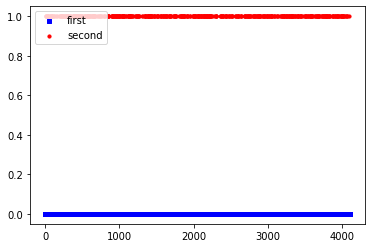

In [20]:
zeros = train[train['label'] == 0]
ones = train[train['label'] == 1]

x0 = zeros.index
y0 = zeros['label']

x1 = ones.index
y1 = ones['label']

plt.scatter(x0, y0, s=10, c='b', marker="s", label='first')
plt.scatter(x1,y1, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

In [22]:
train_y=train['label'] ## predictions
train_x=train.drop(['label'],axis=1) ## dependent var

In [23]:
test=pd.read_csv('test.csv')
test.head()

,desert,info,contention,esaplanade,aa,syd,showroomscity,dinero,goigng,cable,place,08702840625,nightsexcellent,08715705022,peach,busy,worlds,gentleman,jenne,max6month,websitenow,lousy,m100,caps,mouth,young,sooooo,gbpsms,gaze,sundayish,stocked,gut,08712466669,fatty,monkeespeople,strong,relieved,x2,dasara,conserve,...,09701213186,aka,illspeak,reckon,prsn,ryan,call2optout674,titles,reaching,guessin,built,landing,shopthe,people,dontcha,watevr,bambling,curious,payed2day,plsi,tp,insha,09058097189,enough,sources,skins,sen,consent,09061209465,farm,txtno,ystrdayice,overtime,pleasure,internal,reltnship,arrange,opps,aig,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
test_y=test['label']
test_x=test.drop(['label'],axis=1)

In [26]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [27]:
# Train the model using the training sets and check score on test dataset
support.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [28]:
predicted= support.predict(test_x)
predicted[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
given = test_y[:10]
list(given)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
f1Score=f1_score(test_y,predicted)

accuracy=accuracy_score(test_y,predicted)
precision=precision_score(test_y,predicted)
recall=recall_score(test_y,predicted)

In [32]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,accuracy,precision,recall))

Model's Performance Measures:

F1-Score: 0.8965517241379309 
Accuracy: 0.9766081871345029 
Precision: 0.9811320754716981 
Recall: 0.8253968253968254


Confusion matrix: 
 [[898   2]
 [ 22 104]] 



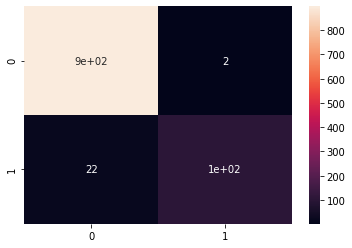

In [39]:
cf_matrix = confusion_matrix(test_y,predicted)
print("Confusion matrix: \n", cf_matrix, "\n")

sns.heatmap(cf_matrix, annot=True)

In [ ]:
train.to_csv( "pred.csv")